In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [4]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# <font color='blue'>Feature Selection:</font>
  Selection important columns to build our prediction model  
  df1 has import features from our original data frame so our df1 has =["location","size","total_sqft","bath","price"]

In [9]:
df1 = df.drop(['area_type','society','balcony','availability'],axis=1)

In [10]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


#  <font color='blue'>Data cleaning: Handling NA values</font>

In [11]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df2.shape

(13246, 5)

# <font color='blue'>Feature Engineering</font>

In [14]:
df2["bhk"]= df2["size"].apply(lambda x: int(x.split(" ")[0]))

In [15]:
df2["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

## Rough execution:

In [16]:
s = "1113 - 1384"
l= s.split(" - ")
total_sum = int(l[0]) + int(l[1])
total_sum /len(l)

1248.5

### <font color='black'> Above shows that total_sqft can be a range ("1133 - 1384") Here we gonna take average of their min and max values There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. </font>

In [17]:
def is_float(x):
    try:
        l = list(map(int , x.split(" - ")))
        total_sum = sum(l)
        return total_sum/len(l)
    
    except:
        return None

In [18]:
df2["total_sqft"]= df2["total_sqft"].apply(is_float)

In [19]:
is_float(s) , is_float("12321")

(1248.5, 12321.0)

In [20]:
df2.isnull().sum()

location        0
size            0
total_sqft    136
bath            0
price           0
bhk             0
dtype: int64

In [21]:
df2.dropna(inplace=True)
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [22]:
df2

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


# <font color='blue'>Feature Engineering:</font> 
#### Add new feature price_per_sqft 

In [23]:
df3 = df2.copy()
df3["price_per_sqft"] = df3["price"]*100000/ df3["total_sqft"]
df3
# because i just multiple by 10000 all operation wher gettting wrong and accuracy is 
# only 60 to calculate price per sqft multiple by 100000 and and divide it by total_sqft 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


###  Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [24]:
df3["location"]= df3["location"].apply(lambda x: x.strip())

In [25]:
location_stat = df3.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stat

location
Whitefield          533
Sarjapur  Road      391
Electronic City     304
Kanakpura Road      259
Thanisandra         234
                   ... 
Kanakapura  Rod       1
1 Giri Nagar          1
Kanakapura Road       1
Kanakapura Road,      1
whitefiled            1
Name: location, Length: 1284, dtype: int64

In [26]:
location_less_10 = location_stat[location_stat<10]
location_less_10

location
Ejipura               9
2nd Phase JP Nagar    9
Lingarajapuram        9
Mathikere             9
Chennammana Kere      9
                     ..
Kanakapura  Rod       1
1 Giri Nagar          1
Kanakapura Road       1
Kanakapura Road,      1
whitefiled            1
Name: location, Length: 1030, dtype: int64

In [27]:
len(location_less_10)

1030

In [28]:
 df3["location"] = df3["location"].apply(lambda x: "other" if x in location_less_10 else x)

In [29]:
df3.groupby("location")["location"].agg("count").sort_values(ascending=False)

location
other                    2714
Whitefield                533
Sarjapur  Road            391
Electronic City           304
Kanakpura Road            259
                         ... 
Thyagaraja Nagar           10
Basapura                   10
Sadashiva Nagar            10
1st Block Koramangala      10
Dairy Circle               10
Name: location, Length: 255, dtype: int64

In [30]:
len(df3.location.unique())

255

In [31]:
df3.shape


(13110, 7)

# <font color='blue'>Remove Outliers </font> 
### 1.Squre foot and bhk , where we asumme that 1 bhk atleast has 500 sqft area and remove those values those sqft area is less

In [32]:
df4= df3.copy()

In [33]:
df4[df4['total_sqft']/df4["bhk"] < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [34]:
df4 = df4[~(df4['total_sqft']/df4["bhk"] < 300)]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


### 2 Now on bath col , so here we only take those values where bath is at bhk + 2 means if we have 3 bhk house then it  maxium have 5 bath anyting that doesn't fall under it we are gonna remove it as outliers

In [35]:
df4[df4["bath"]> df4["bhk"]+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1078,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
2620,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
6838,Rajaji Nagar,5 BHK,7500.0,8.0,1700.0,5,22666.666667
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
9974,Sector 1 HSR Layout,3 Bedroom,2400.0,6.0,775.0,3,32291.666667
11366,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
12443,other,4 Bedroom,4350.0,8.0,2600.0,4,59770.114943
13067,other,10 Bedroom,7150.0,13.0,3600.0,10,50349.650350


In [36]:
df4 = df4[~(df4["bath"]> df4["bhk"]+2)]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


### 3.Now on price_per_sqft : we use std oulier method and only takes those values who are under 1 std area and remove all others 

In [37]:
def remove_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [38]:
df5 = remove_outlier(df4)
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10132,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10133,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10134,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10135,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


## Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

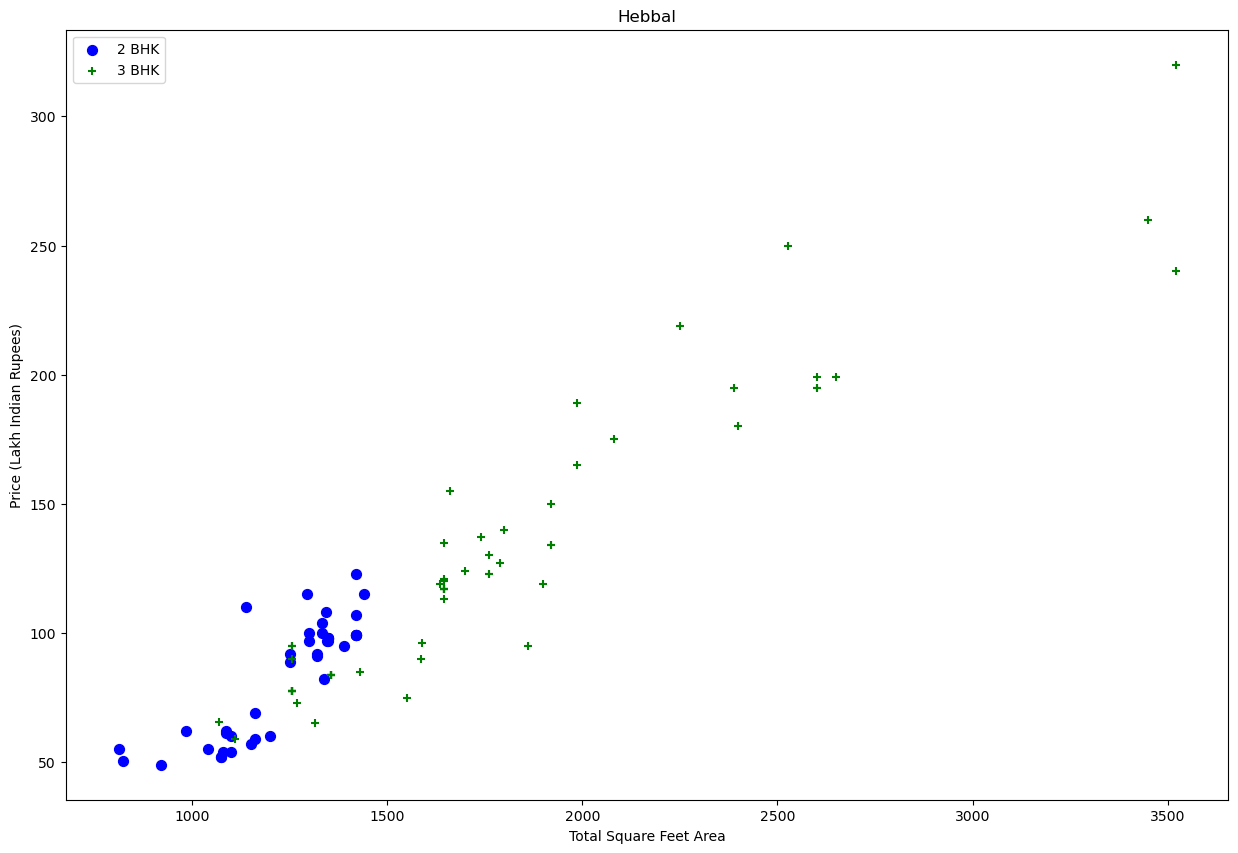

In [39]:
def plot_scatter_chat(df, location):
    bhk2 = df[(df.location==location) & (df["bhk"]==2)]
    bhk3 = df[(df.location==location) & (df["bhk"]==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2["total_sqft"] , bhk2["price"],color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3["total_sqft"] , bhk3["price"], marker="+", label='3 BHK', color='green' , s=40)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()
plot_scatter_chat(df5 ,"Hebbal")

In [40]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [41]:
df6 = remove_bhk_outliers(df5)
df6.shape

(7314, 7)

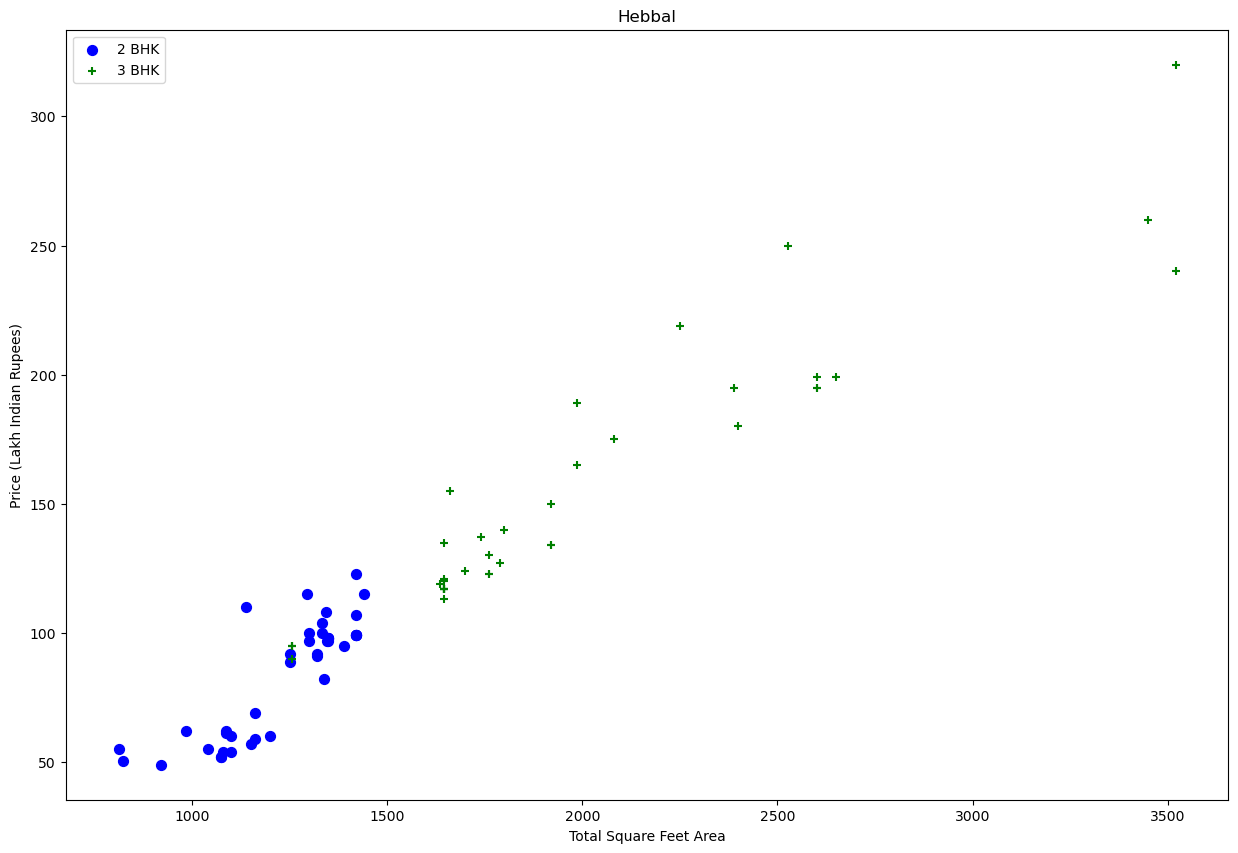

In [42]:
plot_scatter_chat(df6 ,"Hebbal")

# <font color='blue'> Drop unwanted col </font>

In [43]:
df7 = df6.drop(["size","price_per_sqft"],axis=1)

In [44]:
df7

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10128,other,1200.0,2.0,70.0,2
10129,other,1800.0,1.0,200.0,1
10132,other,1353.0,2.0,110.0,2
10133,other,812.0,1.0,26.0,1


In [45]:
df7.to_csv("BHP_clean_dataset")

# <font color='blue'> Apply encoding on location col to convert it from string to numbe </font>

In [46]:
df8 = pd.get_dummies(df7 , columns=["location"], prefix="", prefix_sep="")
df8

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10128,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10129,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10132,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10133,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
df9 = df8.copy()

# <font color='blue'>Now seperate Input and outpu X , y </font>

In [48]:
X = df9.drop("price",axis=1)
y = df9["price"]

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [50]:
X_train.shape

(5851, 258)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8723599794548386

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [54]:
cv = ShuffleSplit(n_splits=5 ,test_size=0.2, random_state=0)
score =cross_val_score(LinearRegression(), X , y, cv=cv)
np.mean(score)

0.8605789999257114

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [56]:
def Accuracy(x,y):
    model_params = {
        'linear_regression':{
            "model":LinearRegression(),
            "params":{}
        },
        'Decision_tree':{
            "model":DecisionTreeRegressor(),
            "params":{
                "criterion":['mse',"friedman_mse"],
                "splitter":["best","random"]
            }
        }
    }
    score =[]
    cv = ShuffleSplit(n_splits=5 ,test_size=0.2, random_state=0)
    for model , params in model_params.items():
        clf = GridSearchCV(params["model"],params["params"],cv =cv)
        clf.fit(X, y)
        score.append(
        {
            "model":model,
            "Best_params":clf.best_params_,
            "Best_score":clf.best_score_
        })
    return pd.DataFrame(score , columns=["model","Best_params","Best_score"])

    

In [57]:
df =Accuracy(X, y)
df

,model,Best_params,Best_score
0,linear_regression,{},0.860579
1,Decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'ran...",0.839027


In [58]:
# location = "others"
# a= np.where(X.columns==location)[0]
# a

In [59]:
# np.zeros(len(X.columns))

In [60]:
def predict_price(location, sqft, bath , bhk):
    loc_index = np.where(X.columns==location)[0]
    
    x= np.zeros(len(X.columns))
    x[0]= sqft
    x[1]=bath
    x[2]=bhk
    try:
        if loc_index >= 0:
            x[loc_index]=1 
    except:
        x[len(X.columns)]=1
        
    return model.predict([x])[0]

In [61]:
predict_price("Electronic City Phase II",1056,2,2)

34.38320144171954

In [63]:
import pickle
with open("banglore_predict_model.pickle", "wb") as f:
    pickle.dump(model, f)

In [65]:
import json 
columns={
    "data_columns": [col.lower() for col in X ]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))